In [1]:
%cd ../

/home/zulqarnain/Code/ntfa_rewrite_batching_fixed/htfatorch


In [2]:
import logging
import numpy as np
import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.tardb as tardb
import htfa_torch.utils as utils

In [3]:
%matplotlib inline

In [4]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [5]:
affvids_db = tardb.FmriTarDataset('data/affvids2018_mc_zrest_norest.tar')

In [6]:
dtfa = DTFA.DeepTFA(affvids_db, num_factors=100, embedding_dim=2)

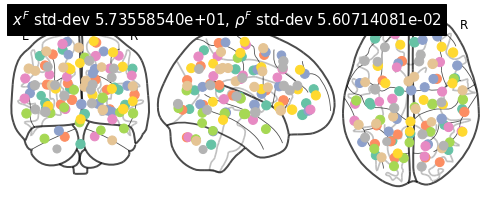

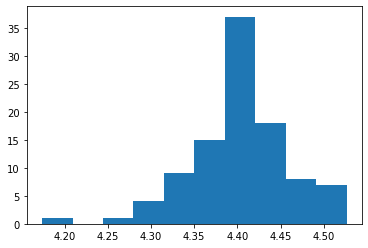

(<nilearn.plotting.displays.OrthoProjector at 0x7fa9a4b809d0>,
 tensor([[-41.0890, -21.3493,  10.4383],
         [ 54.9741, -25.7458,  38.7620],
         [ 36.0875, -42.4405,  19.1681],
         [  4.7213,  44.6235,  -9.0884],
         [-11.3576,  -6.8876,  37.5392],
         [-18.4414, -58.9965,  58.7448],
         [  0.3040, -51.3288, -40.5308],
         [ 40.3284, -68.7604,  16.6085],
         [-36.0529, -74.2515,  -3.1026],
         [ 47.3146,   6.6322,   0.8265],
         [-42.4524, -19.1815,  52.1786],
         [-36.6859,  48.5765,   2.8734],
         [-10.5957,  56.4644,  17.7664],
         [ 28.2284,   6.0945,  16.5455],
         [-20.3002, -59.6637,   1.1330],
         [-13.0908, -52.3947,  23.4959],
         [-28.8124,   4.3359,  53.8263],
         [ 31.2818, -81.5998,  -3.8796],
         [-35.0212, -42.9305,  22.0685],
         [ 57.2004, -28.7448,  11.2779],
         [-16.2624, -76.9577, -32.8702],
         [ 16.7903, -43.2805,  66.2894],
         [ -8.6299,  24.6736,   6.0

In [7]:
dtfa.visualize_factor_embedding()

In [8]:
dtfa.num_blocks

708

In [9]:
dtfa.num_voxels

81638

In [10]:
losses = dtfa.train(num_steps=1500, learning_rate={'q': 1e-2, 'p': 1e-4}, log_level=logging.INFO, num_particles=1,
                    batch_size=256, use_cuda=True, checkpoint_steps=100, patience=500,
                    blocks_filter=affvids_db.inference_filter(training=True))

09/18/2021 22:08:58 [Epoch 1] (90331ms) ELBO -7.33923131e+10 = log-likelihood -7.33636003e+10 - KL from prior 2.87129762e+07
09/18/2021 22:08:58 Saving checkpoint...
09/18/2021 22:09:10 [Epoch 2] (11860ms) ELBO -7.17436874e+10 = log-likelihood -7.17212319e+10 - KL from prior 2.24559065e+07
09/18/2021 22:09:22 [Epoch 3] (11938ms) ELBO -7.04603899e+10 = log-likelihood -7.04405965e+10 - KL from prior 1.97933644e+07
09/18/2021 22:09:34 [Epoch 4] (12050ms) ELBO -6.94724337e+10 = log-likelihood -6.94546685e+10 - KL from prior 1.77651492e+07
09/18/2021 22:09:46 [Epoch 5] (11995ms) ELBO -6.87421987e+10 = log-likelihood -6.87259995e+10 - KL from prior 1.61995337e+07
09/18/2021 22:09:58 [Epoch 6] (11880ms) ELBO -6.81574924e+10 = log-likelihood -6.81430360e+10 - KL from prior 1.44568407e+07
09/18/2021 22:10:10 [Epoch 7] (12287ms) ELBO -6.76809473e+10 = log-likelihood -6.76665765e+10 - KL from prior 1.43709081e+07
09/18/2021 22:10:22 [Epoch 8] (11982ms) ELBO -6.72467329e+10 = log-likelihood -6.723

09/18/2021 22:21:58 [Epoch 66] (12086ms) ELBO -5.28672422e+10 = log-likelihood -5.28633490e+10 - KL from prior 3.89325816e+06
09/18/2021 22:22:10 [Epoch 67] (12135ms) ELBO -5.28320190e+10 = log-likelihood -5.28281495e+10 - KL from prior 3.86955353e+06
09/18/2021 22:22:22 [Epoch 68] (12007ms) ELBO -5.27887852e+10 = log-likelihood -5.27849176e+10 - KL from prior 3.86759468e+06
09/18/2021 22:22:34 [Epoch 69] (12262ms) ELBO -5.27552108e+10 = log-likelihood -5.27513525e+10 - KL from prior 3.85823648e+06
09/18/2021 22:22:47 [Epoch 70] (12325ms) ELBO -5.27245935e+10 = log-likelihood -5.27207712e+10 - KL from prior 3.82238429e+06
09/18/2021 22:22:59 [Epoch 71] (12027ms) ELBO -5.26890584e+10 = log-likelihood -5.26852362e+10 - KL from prior 3.82226298e+06
09/18/2021 22:23:11 [Epoch 72] (12034ms) ELBO -5.26567698e+10 = log-likelihood -5.26529658e+10 - KL from prior 3.80404169e+06
09/18/2021 22:23:23 [Epoch 73] (11886ms) ELBO -5.26298574e+10 = log-likelihood -5.26260576e+10 - KL from prior 3.79982

09/18/2021 22:34:59 [Epoch 131] (11885ms) ELBO -5.16128953e+10 = log-likelihood -5.16088896e+10 - KL from prior 4.00573391e+06
09/18/2021 22:35:11 [Epoch 132] (11916ms) ELBO -5.16055045e+10 = log-likelihood -5.16014930e+10 - KL from prior 4.01151821e+06
09/18/2021 22:35:23 [Epoch 133] (11883ms) ELBO -5.15960454e+10 = log-likelihood -5.15920259e+10 - KL from prior 4.01975638e+06
09/18/2021 22:35:35 [Epoch 134] (11995ms) ELBO -5.15874175e+10 = log-likelihood -5.15833880e+10 - KL from prior 4.02948639e+06
09/18/2021 22:35:47 [Epoch 135] (12396ms) ELBO -5.15764749e+10 = log-likelihood -5.15724385e+10 - KL from prior 4.03653773e+06
09/18/2021 22:35:59 [Epoch 136] (11881ms) ELBO -5.15709014e+10 = log-likelihood -5.15668650e+10 - KL from prior 4.03626738e+06
09/18/2021 22:36:11 [Epoch 137] (12370ms) ELBO -5.15646525e+10 = log-likelihood -5.15606067e+10 - KL from prior 4.04583896e+06
09/18/2021 22:36:24 [Epoch 138] (12101ms) ELBO -5.15566043e+10 = log-likelihood -5.15525513e+10 - KL from prior

09/18/2021 22:48:03 [Epoch 196] (12034ms) ELBO -5.12278057e+10 = log-likelihood -5.12234112e+10 - KL from prior 4.39467006e+06
09/18/2021 22:48:16 [Epoch 197] (12453ms) ELBO -5.12239435e+10 = log-likelihood -5.12195443e+10 - KL from prior 4.39904768e+06
09/18/2021 22:48:28 [Epoch 198] (12411ms) ELBO -5.12219906e+10 = log-likelihood -5.12175859e+10 - KL from prior 4.40454368e+06
09/18/2021 22:48:40 [Epoch 199] (12115ms) ELBO -5.12180940e+10 = log-likelihood -5.12136844e+10 - KL from prior 4.40970945e+06
09/18/2021 22:48:53 [Epoch 200] (12311ms) ELBO -5.12116381e+10 = log-likelihood -5.12072222e+10 - KL from prior 4.41594477e+06
09/18/2021 22:49:05 [Epoch 201] (12368ms) ELBO -5.12055342e+10 = log-likelihood -5.12011170e+10 - KL from prior 4.41706093e+06
09/18/2021 22:49:05 Saving checkpoint...
09/18/2021 22:49:17 [Epoch 202] (12179ms) ELBO -5.12015880e+10 = log-likelihood -5.11971608e+10 - KL from prior 4.42726698e+06
09/18/2021 22:49:29 [Epoch 203] (11930ms) ELBO -5.11968933e+10 = log-l

09/18/2021 23:01:10 [Epoch 261] (12026ms) ELBO -5.10327763e+10 = log-likelihood -5.10280875e+10 - KL from prior 4.68871254e+06
09/18/2021 23:01:22 [Epoch 262] (11996ms) ELBO -5.10326996e+10 = log-likelihood -5.10280083e+10 - KL from prior 4.69149250e+06
09/18/2021 23:01:34 [Epoch 263] (11886ms) ELBO -5.10318510e+10 = log-likelihood -5.10271532e+10 - KL from prior 4.69767227e+06
09/18/2021 23:01:46 [Epoch 264] (11897ms) ELBO -5.10311873e+10 = log-likelihood -5.10264863e+10 - KL from prior 4.70083772e+06
09/18/2021 23:01:58 [Epoch 265] (11875ms) ELBO -5.10270037e+10 = log-likelihood -5.10222996e+10 - KL from prior 4.70398918e+06
09/18/2021 23:02:09 [Epoch 266] (11889ms) ELBO -5.10256217e+10 = log-likelihood -5.10209116e+10 - KL from prior 4.71002523e+06
09/18/2021 23:02:22 [Epoch 267] (12055ms) ELBO -5.10206132e+10 = log-likelihood -5.10159001e+10 - KL from prior 4.71330914e+06
09/18/2021 23:02:34 [Epoch 268] (11996ms) ELBO -5.10195511e+10 = log-likelihood -5.10148344e+10 - KL from prior

09/18/2021 23:14:13 [Epoch 326] (12137ms) ELBO -5.09225896e+10 = log-likelihood -5.09176746e+10 - KL from prior 4.91512409e+06
09/18/2021 23:14:25 [Epoch 327] (12004ms) ELBO -5.09217637e+10 = log-likelihood -5.09168431e+10 - KL from prior 4.92087605e+06
09/18/2021 23:14:37 [Epoch 328] (12010ms) ELBO -5.09193778e+10 = log-likelihood -5.09144558e+10 - KL from prior 4.92194451e+06
09/18/2021 23:14:49 [Epoch 329] (11997ms) ELBO -5.09164624e+10 = log-likelihood -5.09115390e+10 - KL from prior 4.92362879e+06
09/18/2021 23:15:01 [Epoch 330] (12010ms) ELBO -5.09127576e+10 = log-likelihood -5.09078282e+10 - KL from prior 4.92920385e+06
09/18/2021 23:15:13 [Epoch 331] (12054ms) ELBO -5.09098048e+10 = log-likelihood -5.09048728e+10 - KL from prior 4.93194068e+06
09/18/2021 23:15:25 [Epoch 332] (12199ms) ELBO -5.09068292e+10 = log-likelihood -5.09018955e+10 - KL from prior 4.93349975e+06
09/18/2021 23:15:37 [Epoch 333] (11967ms) ELBO -5.09060251e+10 = log-likelihood -5.09010881e+10 - KL from prior

09/18/2021 23:27:16 [Epoch 391] (12300ms) ELBO -5.08353697e+10 = log-likelihood -5.08302700e+10 - KL from prior 5.09957050e+06
09/18/2021 23:27:28 [Epoch 392] (12170ms) ELBO -5.08320477e+10 = log-likelihood -5.08269441e+10 - KL from prior 5.10354118e+06
09/18/2021 23:27:41 [Epoch 393] (12139ms) ELBO -5.08311610e+10 = log-likelihood -5.08260586e+10 - KL from prior 5.10236047e+06
09/18/2021 23:27:53 [Epoch 394] (12263ms) ELBO -5.08291470e+10 = log-likelihood -5.08240406e+10 - KL from prior 5.10657831e+06
09/18/2021 23:28:05 [Epoch 395] (12183ms) ELBO -5.08289257e+10 = log-likelihood -5.08238166e+10 - KL from prior 5.10908841e+06
09/18/2021 23:28:17 [Epoch 396] (12392ms) ELBO -5.08274335e+10 = log-likelihood -5.08223203e+10 - KL from prior 5.11312828e+06
09/18/2021 23:28:30 [Epoch 397] (12055ms) ELBO -5.08250965e+10 = log-likelihood -5.08199817e+10 - KL from prior 5.11486073e+06
09/18/2021 23:28:42 [Epoch 398] (12098ms) ELBO -5.08239597e+10 = log-likelihood -5.08188433e+10 - KL from prior

09/18/2021 23:40:23 [Epoch 456] (11918ms) ELBO -5.07610359e+10 = log-likelihood -5.07557834e+10 - KL from prior 5.25262774e+06
09/18/2021 23:40:35 [Epoch 457] (11924ms) ELBO -5.07602619e+10 = log-likelihood -5.07550079e+10 - KL from prior 5.25387998e+06
09/18/2021 23:40:47 [Epoch 458] (11990ms) ELBO -5.07614562e+10 = log-likelihood -5.07561981e+10 - KL from prior 5.25791704e+06
09/18/2021 23:40:59 [Epoch 459] (12034ms) ELBO -5.07637609e+10 = log-likelihood -5.07585027e+10 - KL from prior 5.25804960e+06
09/18/2021 23:41:11 [Epoch 460] (11883ms) ELBO -5.07640048e+10 = log-likelihood -5.07587428e+10 - KL from prior 5.26182329e+06
09/18/2021 23:41:23 [Epoch 461] (12102ms) ELBO -5.07626175e+10 = log-likelihood -5.07573539e+10 - KL from prior 5.26346197e+06
09/18/2021 23:41:35 [Epoch 462] (12373ms) ELBO -5.07637654e+10 = log-likelihood -5.07584996e+10 - KL from prior 5.26572995e+06
09/18/2021 23:41:47 [Epoch 463] (12113ms) ELBO -5.07638797e+10 = log-likelihood -5.07586112e+10 - KL from prior

09/18/2021 23:53:27 [Epoch 521] (12336ms) ELBO -5.07109194e+10 = log-likelihood -5.07055373e+10 - KL from prior 5.38218307e+06
09/18/2021 23:53:40 [Epoch 522] (12054ms) ELBO -5.07141245e+10 = log-likelihood -5.07087397e+10 - KL from prior 5.38450035e+06
09/18/2021 23:53:51 [Epoch 523] (11965ms) ELBO -5.07175562e+10 = log-likelihood -5.07121710e+10 - KL from prior 5.38507796e+06
09/18/2021 23:54:03 [Epoch 524] (11988ms) ELBO -5.07195954e+10 = log-likelihood -5.07142091e+10 - KL from prior 5.38656124e+06
09/18/2021 23:54:15 [Epoch 525] (11998ms) ELBO -5.07217071e+10 = log-likelihood -5.07163171e+10 - KL from prior 5.39026696e+06
09/18/2021 23:54:27 [Epoch 526] (11904ms) ELBO -5.07219703e+10 = log-likelihood -5.07165801e+10 - KL from prior 5.39025731e+06
09/18/2021 23:54:39 [Epoch 527] (11924ms) ELBO -5.07202633e+10 = log-likelihood -5.07148703e+10 - KL from prior 5.39277888e+06
09/18/2021 23:54:51 [Epoch 528] (11947ms) ELBO -5.07192036e+10 = log-likelihood -5.07138097e+10 - KL from prior

09/19/2021 00:06:32 [Epoch 586] (11938ms) ELBO -5.06674845e+10 = log-likelihood -5.06619915e+10 - KL from prior 5.49301524e+06
09/19/2021 00:06:44 [Epoch 587] (11973ms) ELBO -5.06684169e+10 = log-likelihood -5.06629202e+10 - KL from prior 5.49662023e+06
09/19/2021 00:06:56 [Epoch 588] (12059ms) ELBO -5.06674283e+10 = log-likelihood -5.06619307e+10 - KL from prior 5.49783295e+06
09/19/2021 00:07:08 [Epoch 589] (11964ms) ELBO -5.06676693e+10 = log-likelihood -5.06621692e+10 - KL from prior 5.49995525e+06
09/19/2021 00:07:21 [Epoch 590] (12354ms) ELBO -5.06692006e+10 = log-likelihood -5.06637016e+10 - KL from prior 5.49897618e+06
09/19/2021 00:07:33 [Epoch 591] (12361ms) ELBO -5.06709787e+10 = log-likelihood -5.06654773e+10 - KL from prior 5.50161497e+06
09/19/2021 00:07:45 [Epoch 592] (12323ms) ELBO -5.06722980e+10 = log-likelihood -5.06667963e+10 - KL from prior 5.50176256e+06
09/19/2021 00:07:57 [Epoch 593] (11941ms) ELBO -5.06735349e+10 = log-likelihood -5.06680309e+10 - KL from prior

09/19/2021 00:19:39 [Epoch 651] (12035ms) ELBO -5.06486386e+10 = log-likelihood -5.06430470e+10 - KL from prior 5.59144163e+06
09/19/2021 00:19:51 [Epoch 652] (12169ms) ELBO -5.06477606e+10 = log-likelihood -5.06421695e+10 - KL from prior 5.59123622e+06
09/19/2021 00:20:03 [Epoch 653] (11940ms) ELBO -5.06453262e+10 = log-likelihood -5.06397322e+10 - KL from prior 5.59379854e+06
09/19/2021 00:20:15 [Epoch 654] (11887ms) ELBO -5.06427824e+10 = log-likelihood -5.06371861e+10 - KL from prior 5.59621014e+06
09/19/2021 00:20:27 [Epoch 655] (11886ms) ELBO -5.06404761e+10 = log-likelihood -5.06348804e+10 - KL from prior 5.59577416e+06
09/19/2021 00:20:39 [Epoch 656] (12238ms) ELBO -5.06373461e+10 = log-likelihood -5.06317466e+10 - KL from prior 5.59959588e+06
09/19/2021 00:20:51 [Epoch 657] (12289ms) ELBO -5.06368954e+10 = log-likelihood -5.06312960e+10 - KL from prior 5.59955846e+06
09/19/2021 00:21:04 [Epoch 658] (12365ms) ELBO -5.06369339e+10 = log-likelihood -5.06313349e+10 - KL from prior

09/19/2021 00:32:46 [Epoch 716] (11888ms) ELBO -5.06135483e+10 = log-likelihood -5.06078701e+10 - KL from prior 5.67824662e+06
09/19/2021 00:32:58 [Epoch 717] (11857ms) ELBO -5.06121444e+10 = log-likelihood -5.06064639e+10 - KL from prior 5.68070492e+06
09/19/2021 00:33:10 [Epoch 718] (11879ms) ELBO -5.06104678e+10 = log-likelihood -5.06047868e+10 - KL from prior 5.68110642e+06
09/19/2021 00:33:22 [Epoch 719] (11938ms) ELBO -5.06101490e+10 = log-likelihood -5.06044637e+10 - KL from prior 5.68532383e+06
09/19/2021 00:33:34 [Epoch 720] (11905ms) ELBO -5.06100387e+10 = log-likelihood -5.06043544e+10 - KL from prior 5.68440045e+06
09/19/2021 00:33:46 [Epoch 721] (11922ms) ELBO -5.06100715e+10 = log-likelihood -5.06043849e+10 - KL from prior 5.68657109e+06
09/19/2021 00:33:58 [Epoch 722] (11910ms) ELBO -5.06106605e+10 = log-likelihood -5.06049714e+10 - KL from prior 5.68914406e+06
09/19/2021 00:34:10 [Epoch 723] (11961ms) ELBO -5.06105692e+10 = log-likelihood -5.06048833e+10 - KL from prior

09/19/2021 00:45:51 [Epoch 781] (12027ms) ELBO -5.05971754e+10 = log-likelihood -5.05914183e+10 - KL from prior 5.75696951e+06
09/19/2021 00:46:03 [Epoch 782] (12017ms) ELBO -5.05940538e+10 = log-likelihood -5.05882956e+10 - KL from prior 5.75805497e+06
09/19/2021 00:46:15 [Epoch 783] (12434ms) ELBO -5.05944833e+10 = log-likelihood -5.05887208e+10 - KL from prior 5.76248360e+06
09/19/2021 00:46:27 [Epoch 784] (11901ms) ELBO -5.05910964e+10 = log-likelihood -5.05853336e+10 - KL from prior 5.76292913e+06
09/19/2021 00:46:39 [Epoch 785] (12074ms) ELBO -5.05902331e+10 = log-likelihood -5.05844712e+10 - KL from prior 5.76186282e+06
09/19/2021 00:46:52 [Epoch 786] (12201ms) ELBO -5.05873231e+10 = log-likelihood -5.05815601e+10 - KL from prior 5.76316089e+06
09/19/2021 00:47:04 [Epoch 787] (12017ms) ELBO -5.05866429e+10 = log-likelihood -5.05808752e+10 - KL from prior 5.76771307e+06
09/19/2021 00:47:16 [Epoch 788] (12081ms) ELBO -5.05838467e+10 = log-likelihood -5.05780799e+10 - KL from prior

09/19/2021 00:58:58 [Epoch 846] (11958ms) ELBO -5.05646198e+10 = log-likelihood -5.05587879e+10 - KL from prior 5.83215288e+06
09/19/2021 00:59:10 [Epoch 847] (11924ms) ELBO -5.05650095e+10 = log-likelihood -5.05591758e+10 - KL from prior 5.83391780e+06
09/19/2021 00:59:22 [Epoch 848] (12006ms) ELBO -5.05651426e+10 = log-likelihood -5.05593084e+10 - KL from prior 5.83415522e+06
09/19/2021 00:59:34 [Epoch 849] (11995ms) ELBO -5.05665812e+10 = log-likelihood -5.05607470e+10 - KL from prior 5.83421047e+06
09/19/2021 00:59:46 [Epoch 850] (12219ms) ELBO -5.05655657e+10 = log-likelihood -5.05597326e+10 - KL from prior 5.83273229e+06
09/19/2021 00:59:58 [Epoch 851] (12094ms) ELBO -5.05662203e+10 = log-likelihood -5.05603849e+10 - KL from prior 5.83549893e+06
09/19/2021 01:00:10 [Epoch 852] (12018ms) ELBO -5.05650116e+10 = log-likelihood -5.05591742e+10 - KL from prior 5.83752537e+06
09/19/2021 01:00:22 [Epoch 853] (12042ms) ELBO -5.05652424e+10 = log-likelihood -5.05594035e+10 - KL from prior

09/19/2021 01:12:02 [Epoch 911] (12326ms) ELBO -5.05453153e+10 = log-likelihood -5.05394172e+10 - KL from prior 5.89790133e+06
09/19/2021 01:12:15 [Epoch 912] (12387ms) ELBO -5.05449325e+10 = log-likelihood -5.05390334e+10 - KL from prior 5.89929244e+06
09/19/2021 01:12:27 [Epoch 913] (11932ms) ELBO -5.05458331e+10 = log-likelihood -5.05399348e+10 - KL from prior 5.89844361e+06
09/19/2021 01:12:39 [Epoch 914] (12233ms) ELBO -5.05479012e+10 = log-likelihood -5.05420041e+10 - KL from prior 5.89729106e+06
09/19/2021 01:12:51 [Epoch 915] (12363ms) ELBO -5.05480579e+10 = log-likelihood -5.05421566e+10 - KL from prior 5.90123615e+06
09/19/2021 01:13:03 [Epoch 916] (12032ms) ELBO -5.05510579e+10 = log-likelihood -5.05451573e+10 - KL from prior 5.90049975e+06
09/19/2021 01:13:16 [Epoch 917] (12120ms) ELBO -5.05530269e+10 = log-likelihood -5.05471224e+10 - KL from prior 5.90436614e+06
09/19/2021 01:13:28 [Epoch 918] (12199ms) ELBO -5.05576747e+10 = log-likelihood -5.05517732e+10 - KL from prior

09/19/2021 01:25:08 [Epoch 976] (12200ms) ELBO -5.05326880e+10 = log-likelihood -5.05267302e+10 - KL from prior 5.95792419e+06
09/19/2021 01:25:20 [Epoch 977] (11966ms) ELBO -5.05333286e+10 = log-likelihood -5.05273712e+10 - KL from prior 5.95733227e+06
09/19/2021 01:25:32 [Epoch 978] (12003ms) ELBO -5.05349661e+10 = log-likelihood -5.05290089e+10 - KL from prior 5.95705710e+06
09/19/2021 01:25:44 [Epoch 979] (11890ms) ELBO -5.05363331e+10 = log-likelihood -5.05303731e+10 - KL from prior 5.96003515e+06
09/19/2021 01:25:56 [Epoch 980] (11966ms) ELBO -5.05376271e+10 = log-likelihood -5.05316664e+10 - KL from prior 5.96070644e+06
09/19/2021 01:26:08 [Epoch 981] (12032ms) ELBO -5.05394684e+10 = log-likelihood -5.05335063e+10 - KL from prior 5.96218154e+06
09/19/2021 01:26:20 [Epoch 982] (12099ms) ELBO -5.05407972e+10 = log-likelihood -5.05348361e+10 - KL from prior 5.96127190e+06
09/19/2021 01:26:32 [Epoch 983] (11939ms) ELBO -5.05402454e+10 = log-likelihood -5.05342827e+10 - KL from prior

09/19/2021 01:38:03 [Epoch 1040] (12040ms) ELBO -5.05195329e+10 = log-likelihood -5.05135224e+10 - KL from prior 6.01025304e+06
09/19/2021 01:38:15 [Epoch 1041] (11993ms) ELBO -5.05179258e+10 = log-likelihood -5.05119140e+10 - KL from prior 6.01181516e+06
09/19/2021 01:38:27 [Epoch 1042] (12145ms) ELBO -5.05188645e+10 = log-likelihood -5.05128536e+10 - KL from prior 6.01098384e+06
09/19/2021 01:38:39 [Epoch 1043] (11982ms) ELBO -5.05188020e+10 = log-likelihood -5.05127874e+10 - KL from prior 6.01442423e+06
09/19/2021 01:38:51 [Epoch 1044] (12078ms) ELBO -5.05194077e+10 = log-likelihood -5.05133923e+10 - KL from prior 6.01542100e+06
09/19/2021 01:39:04 [Epoch 1045] (12225ms) ELBO -5.05197610e+10 = log-likelihood -5.05137442e+10 - KL from prior 6.01691076e+06
09/19/2021 01:39:16 [Epoch 1046] (12047ms) ELBO -5.05207416e+10 = log-likelihood -5.05147260e+10 - KL from prior 6.01556682e+06
09/19/2021 01:39:28 [Epoch 1047] (12016ms) ELBO -5.05213010e+10 = log-likelihood -5.05152829e+10 - KL fr

09/19/2021 01:52:24 [Epoch 1111] (11901ms) ELBO -5.05107799e+10 = log-likelihood -5.05047118e+10 - KL from prior 6.06794950e+06
09/19/2021 01:52:36 [Epoch 1112] (12144ms) ELBO -5.05080114e+10 = log-likelihood -5.05019439e+10 - KL from prior 6.06763276e+06
09/19/2021 01:52:49 [Epoch 1113] (12397ms) ELBO -5.05060948e+10 = log-likelihood -5.05000240e+10 - KL from prior 6.07071487e+06
09/19/2021 01:53:01 [Epoch 1114] (12471ms) ELBO -5.05064847e+10 = log-likelihood -5.05004137e+10 - KL from prior 6.07076955e+06
09/19/2021 01:53:13 [Epoch 1115] (12140ms) ELBO -5.05049865e+10 = log-likelihood -5.04989145e+10 - KL from prior 6.07215934e+06
09/19/2021 01:53:26 [Epoch 1116] (12561ms) ELBO -5.05047844e+10 = log-likelihood -5.04987137e+10 - KL from prior 6.07060025e+06
09/19/2021 01:53:38 [Epoch 1117] (12027ms) ELBO -5.05043001e+10 = log-likelihood -5.04982280e+10 - KL from prior 6.07206821e+06
09/19/2021 01:53:50 [Epoch 1118] (11939ms) ELBO -5.05051391e+10 = log-likelihood -5.04990648e+10 - KL fr

09/19/2021 02:05:35 [Epoch 1176] (12011ms) ELBO -5.04967336e+10 = log-likelihood -5.04906197e+10 - KL from prior 6.11405930e+06
09/19/2021 02:05:47 [Epoch 1177] (12360ms) ELBO -5.04958165e+10 = log-likelihood -5.04896998e+10 - KL from prior 6.11687355e+06
09/19/2021 02:05:59 [Epoch 1178] (12208ms) ELBO -5.04965114e+10 = log-likelihood -5.04903962e+10 - KL from prior 6.11502656e+06
09/19/2021 02:06:11 [Epoch 1179] (12131ms) ELBO -5.04959332e+10 = log-likelihood -5.04898144e+10 - KL from prior 6.11856431e+06
09/19/2021 02:06:23 [Epoch 1180] (12078ms) ELBO -5.04968235e+10 = log-likelihood -5.04907082e+10 - KL from prior 6.11518141e+06
09/19/2021 02:06:36 [Epoch 1181] (12284ms) ELBO -5.04968178e+10 = log-likelihood -5.04906965e+10 - KL from prior 6.12110395e+06
09/19/2021 02:06:48 [Epoch 1182] (12041ms) ELBO -5.04980063e+10 = log-likelihood -5.04918874e+10 - KL from prior 6.11882078e+06
09/19/2021 02:07:00 [Epoch 1183] (12391ms) ELBO -5.04979102e+10 = log-likelihood -5.04917911e+10 - KL fr

09/19/2021 02:18:31 [Epoch 1240] (12258ms) ELBO -5.04821091e+10 = log-likelihood -5.04759525e+10 - KL from prior 6.15643089e+06
09/19/2021 02:18:44 [Epoch 1241] (12466ms) ELBO -5.04820258e+10 = log-likelihood -5.04758659e+10 - KL from prior 6.15992585e+06
09/19/2021 02:18:56 [Epoch 1242] (12062ms) ELBO -5.04844565e+10 = log-likelihood -5.04782982e+10 - KL from prior 6.15829161e+06
09/19/2021 02:19:08 [Epoch 1243] (12309ms) ELBO -5.04864408e+10 = log-likelihood -5.04802796e+10 - KL from prior 6.16106989e+06
09/19/2021 02:19:21 [Epoch 1244] (12408ms) ELBO -5.04895231e+10 = log-likelihood -5.04833638e+10 - KL from prior 6.15922160e+06
09/19/2021 02:19:33 [Epoch 1245] (12548ms) ELBO -5.04915284e+10 = log-likelihood -5.04853666e+10 - KL from prior 6.16202238e+06
09/19/2021 02:19:46 [Epoch 1246] (12456ms) ELBO -5.04947405e+10 = log-likelihood -5.04885816e+10 - KL from prior 6.15911754e+06
09/19/2021 02:19:58 [Epoch 1247] (12152ms) ELBO -5.04957610e+10 = log-likelihood -5.04895972e+10 - KL fr

09/19/2021 02:31:28 [Epoch 1304] (12421ms) ELBO -5.04845890e+10 = log-likelihood -5.04783889e+10 - KL from prior 6.20000564e+06
09/19/2021 02:31:40 [Epoch 1305] (12017ms) ELBO -5.04839418e+10 = log-likelihood -5.04777393e+10 - KL from prior 6.20257185e+06
09/19/2021 02:31:51 [Epoch 1306] (11912ms) ELBO -5.04832444e+10 = log-likelihood -5.04770437e+10 - KL from prior 6.20071786e+06
09/19/2021 02:32:04 [Epoch 1307] (12069ms) ELBO -5.04826356e+10 = log-likelihood -5.04764328e+10 - KL from prior 6.20272433e+06
09/19/2021 02:32:16 [Epoch 1308] (12130ms) ELBO -5.04815100e+10 = log-likelihood -5.04753084e+10 - KL from prior 6.20169549e+06
09/19/2021 02:32:28 [Epoch 1309] (12095ms) ELBO -5.04812649e+10 = log-likelihood -5.04750611e+10 - KL from prior 6.20401299e+06
09/19/2021 02:32:40 [Epoch 1310] (12174ms) ELBO -5.04807316e+10 = log-likelihood -5.04745282e+10 - KL from prior 6.20329861e+06
09/19/2021 02:32:52 [Epoch 1311] (12208ms) ELBO -5.04795687e+10 = log-likelihood -5.04733635e+10 - KL fr

09/19/2021 02:44:34 [Epoch 1369] (12293ms) ELBO -5.04761839e+10 = log-likelihood -5.04699402e+10 - KL from prior 6.24359535e+06
09/19/2021 02:44:46 [Epoch 1370] (12284ms) ELBO -5.04761449e+10 = log-likelihood -5.04699019e+10 - KL from prior 6.24280087e+06
09/19/2021 02:44:58 [Epoch 1371] (12244ms) ELBO -5.04742851e+10 = log-likelihood -5.04680422e+10 - KL from prior 6.24264727e+06
09/19/2021 02:45:11 [Epoch 1372] (12394ms) ELBO -5.04732521e+10 = log-likelihood -5.04670108e+10 - KL from prior 6.24126416e+06
09/19/2021 02:45:23 [Epoch 1373] (12107ms) ELBO -5.04717158e+10 = log-likelihood -5.04654719e+10 - KL from prior 6.24405484e+06
09/19/2021 02:45:35 [Epoch 1374] (11994ms) ELBO -5.04722697e+10 = log-likelihood -5.04660257e+10 - KL from prior 6.24384831e+06
09/19/2021 02:45:47 [Epoch 1375] (12109ms) ELBO -5.04726665e+10 = log-likelihood -5.04664199e+10 - KL from prior 6.24670107e+06
09/19/2021 02:45:59 [Epoch 1376] (11944ms) ELBO -5.04750010e+10 = log-likelihood -5.04687587e+10 - KL fr

09/19/2021 02:57:30 [Epoch 1433] (12274ms) ELBO -5.04667189e+10 = log-likelihood -5.04604390e+10 - KL from prior 6.28003426e+06
09/19/2021 02:57:43 [Epoch 1434] (12265ms) ELBO -5.04651636e+10 = log-likelihood -5.04588843e+10 - KL from prior 6.27935721e+06
09/19/2021 02:57:54 [Epoch 1435] (11876ms) ELBO -5.04630291e+10 = log-likelihood -5.04567500e+10 - KL from prior 6.27913732e+06
09/19/2021 02:58:07 [Epoch 1436] (12165ms) ELBO -5.04611086e+10 = log-likelihood -5.04548294e+10 - KL from prior 6.27939841e+06
09/19/2021 02:58:19 [Epoch 1437] (12550ms) ELBO -5.04585348e+10 = log-likelihood -5.04522535e+10 - KL from prior 6.28129915e+06
09/19/2021 02:58:31 [Epoch 1438] (12119ms) ELBO -5.04563092e+10 = log-likelihood -5.04500286e+10 - KL from prior 6.28026956e+06
09/19/2021 02:58:43 [Epoch 1439] (12075ms) ELBO -5.04550811e+10 = log-likelihood -5.04487987e+10 - KL from prior 6.28241883e+06
09/19/2021 02:58:55 [Epoch 1440] (11995ms) ELBO -5.04547257e+10 = log-likelihood -5.04484433e+10 - KL fr

09/19/2021 03:10:39 [Epoch 1498] (12080ms) ELBO -5.04529260e+10 = log-likelihood -5.04466085e+10 - KL from prior 6.31749548e+06
09/19/2021 03:10:51 [Epoch 1499] (12057ms) ELBO -5.04537611e+10 = log-likelihood -5.04474448e+10 - KL from prior 6.31628810e+06
09/19/2021 03:11:03 [Epoch 1500] (11961ms) ELBO -5.04544731e+10 = log-likelihood -5.04481542e+10 - KL from prior 6.31913864e+06
09/19/2021 03:11:03 Saving checkpoint...


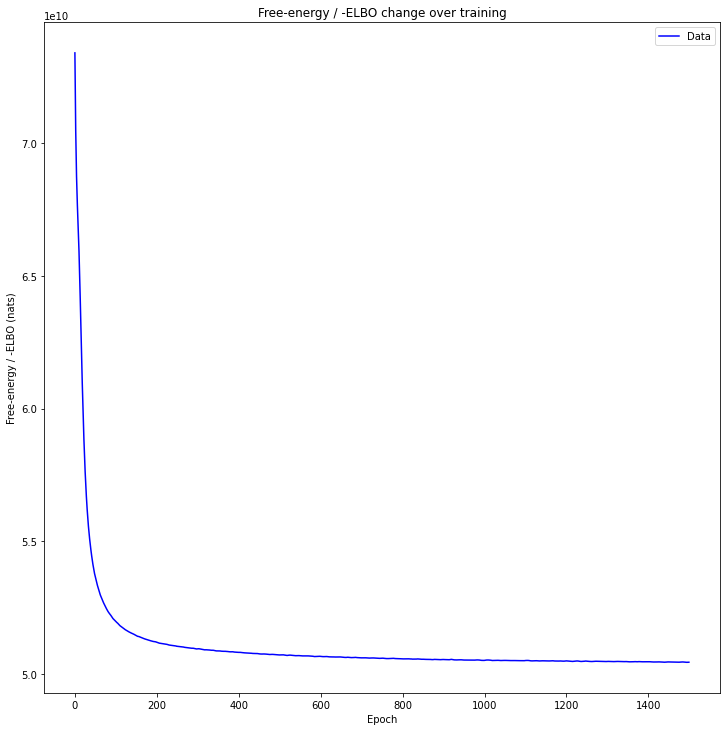

In [11]:
utils.plot_losses(losses)

In [12]:
def task_labeler(task):
    if 'heights' in task:
        return 'Heights'
    elif 'social' in task:
        return 'Social threat'
    elif 'spider' in task:
        return 'Spiders'
    elif 'rest' in task:
        return 'Rest'
    else:
        return None

def rest_task_labeler(task):
    if task == 'rest':
        return 'Rest'
    else:
        return 'Task'

/home/zulqarnain/Code/ntfa_rewrite_batching_fixed/htfatorch/htfa_torch/utils.py:153: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


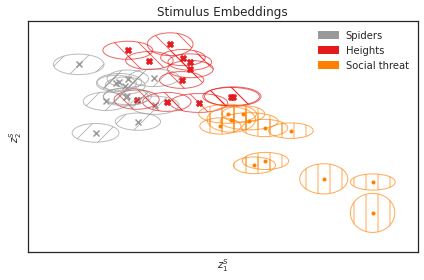

In [13]:
dtfa.scatter_task_embedding(labeler=task_labeler, figsize=None, colormap='Set1',
                            filename='affvids_norest_task_embedding.pdf')

In [14]:
def subject_labeler(subject):
    return 'Subject %d' % subject

/home/zulqarnain/Code/ntfa_rewrite_batching_fixed/htfatorch/htfa_torch/utils.py:153: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


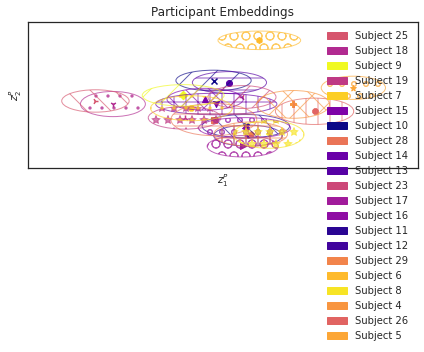

In [15]:
dtfa.scatter_subject_embedding(labeler=subject_labeler, figsize=None, colormap='plasma')

In [16]:
def block_task_labeler(b):
    task = b['task']
    if 'heights' in task:
        return 'Heights'
    elif 'social' in task:
        return 'Social threat'
    elif 'spider' in task:
        return 'Spiders'
    elif 'rest' in task:
        return 'Rest'
    else:
        return None

09/19/2021 03:11:04 Plotting factors for Participant 29, run 2


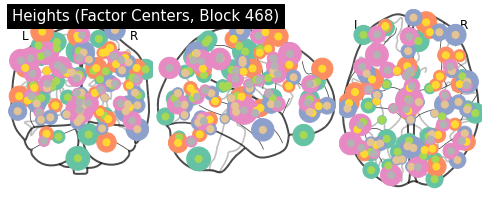

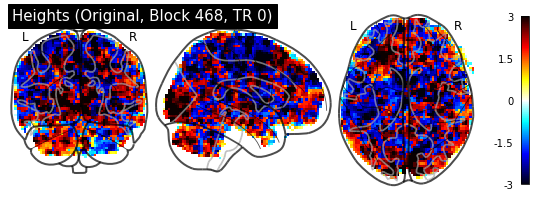

09/19/2021 03:11:09 Reconstruction Error (Frobenius Norm): 3.49521240e+02 out of 3.16198303e+02


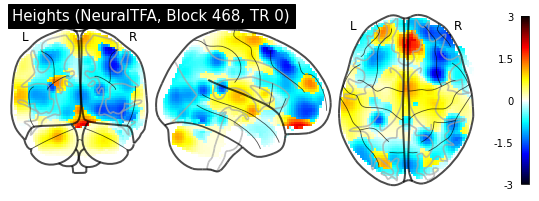

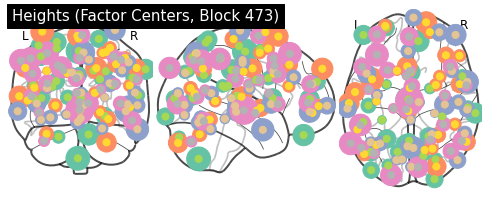

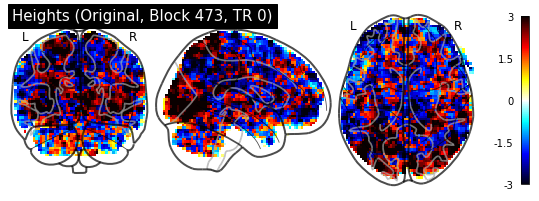

09/19/2021 03:11:15 Reconstruction Error (Frobenius Norm): 3.39619629e+02 out of 3.20182526e+02


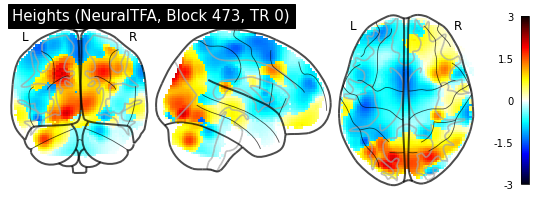

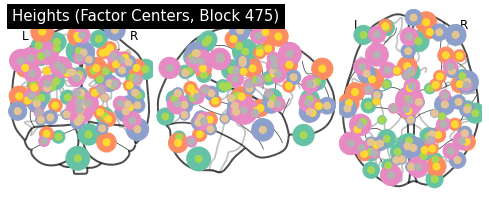

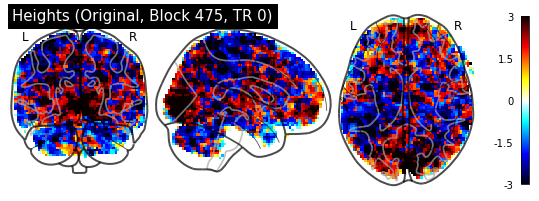

09/19/2021 03:11:21 Reconstruction Error (Frobenius Norm): 3.37220245e+02 out of 3.14812561e+02


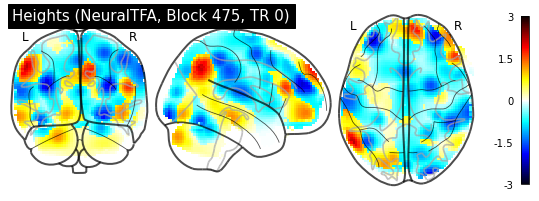

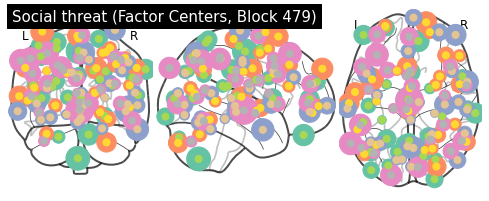

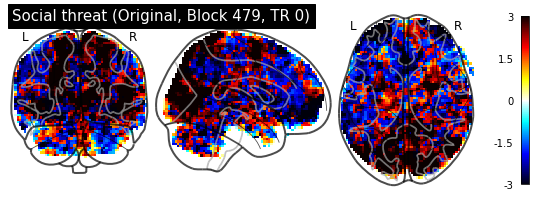

09/19/2021 03:11:28 Reconstruction Error (Frobenius Norm): 3.71816010e+02 out of 3.51695007e+02


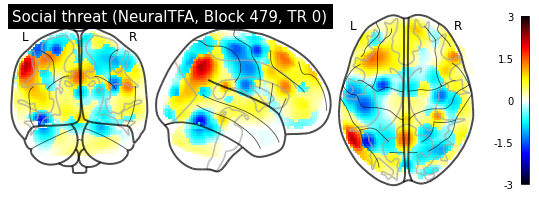

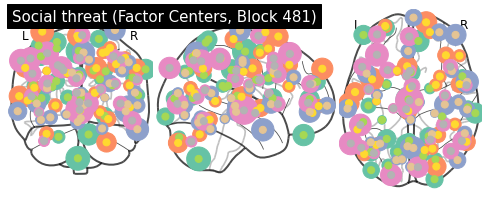

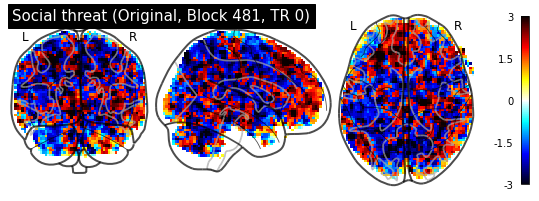

09/19/2021 03:11:35 Reconstruction Error (Frobenius Norm): 3.26733978e+02 out of 2.94889771e+02


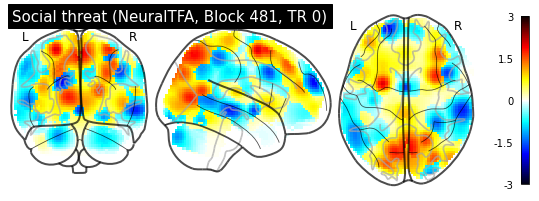

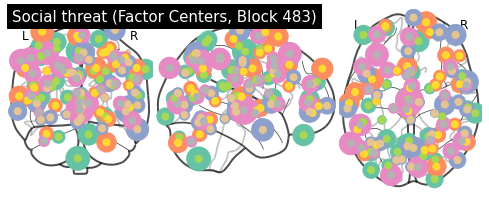

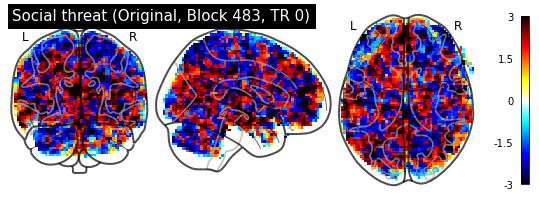

09/19/2021 03:11:43 Reconstruction Error (Frobenius Norm): 3.29261047e+02 out of 2.93689087e+02


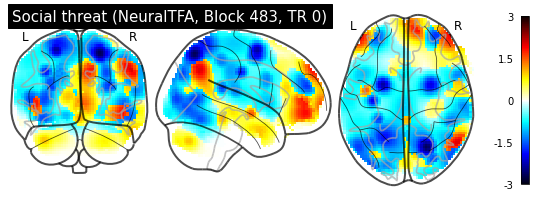

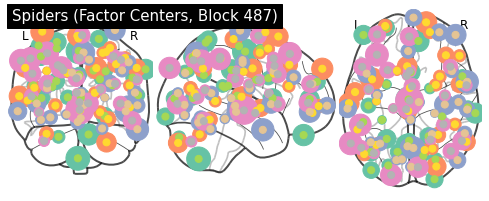

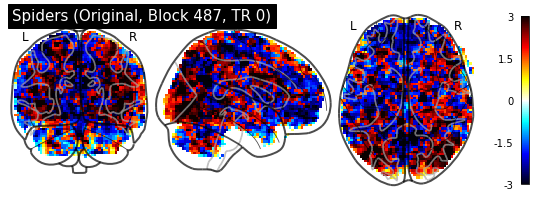

09/19/2021 03:11:51 Reconstruction Error (Frobenius Norm): 3.47596832e+02 out of 3.23665894e+02


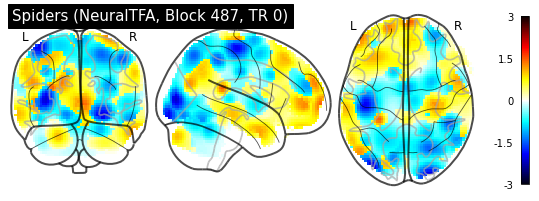

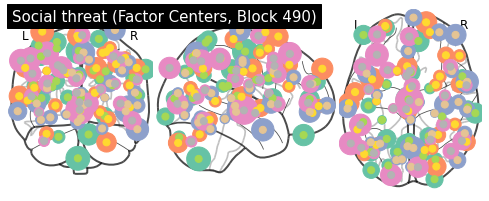

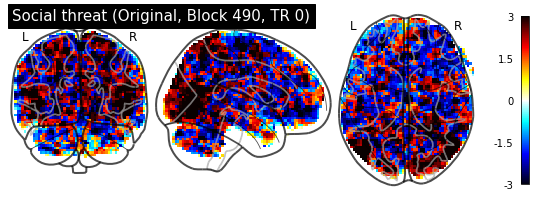

09/19/2021 03:11:59 Reconstruction Error (Frobenius Norm): 3.36942719e+02 out of 3.17898560e+02


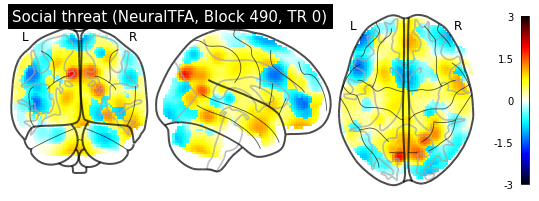

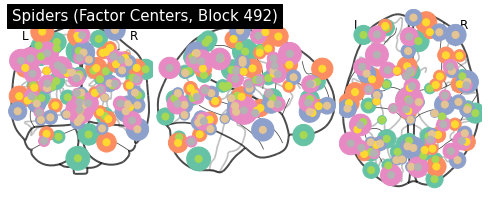

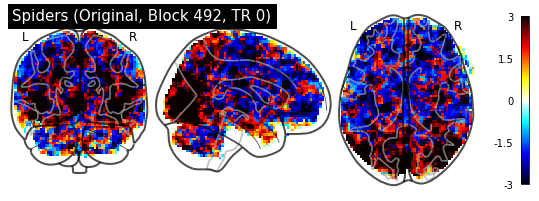

09/19/2021 03:12:07 Reconstruction Error (Frobenius Norm): 3.63687500e+02 out of 3.38312897e+02


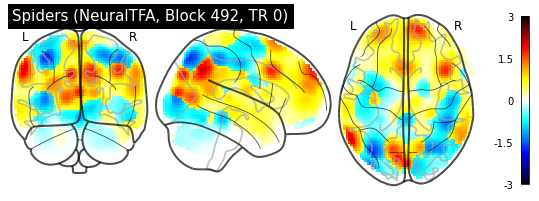

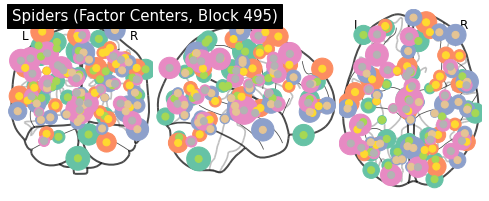

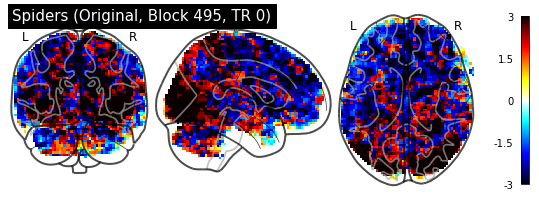

09/19/2021 03:12:17 Reconstruction Error (Frobenius Norm): 3.72228210e+02 out of 3.49125549e+02


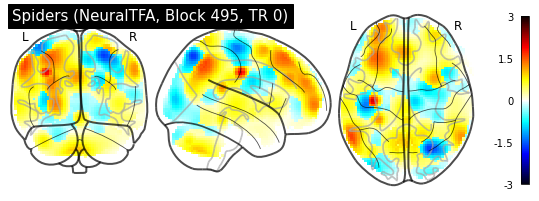

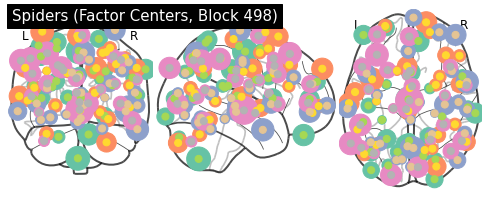

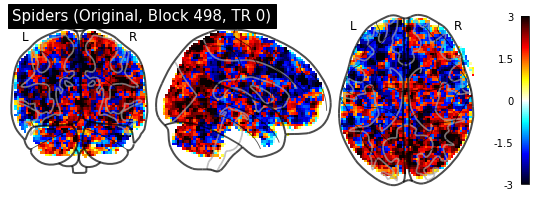

09/19/2021 03:12:26 Reconstruction Error (Frobenius Norm): 3.44417633e+02 out of 2.98772491e+02


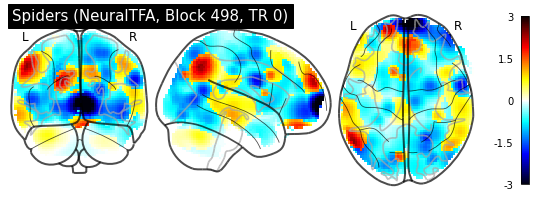

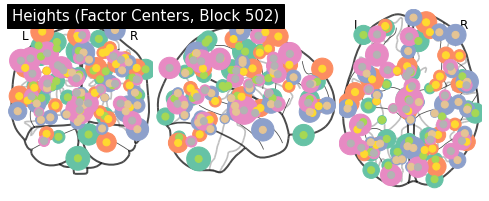

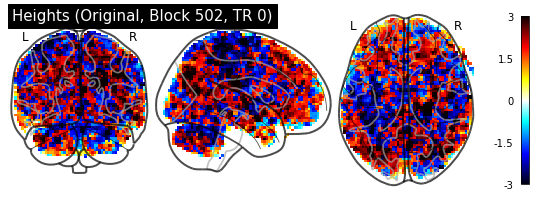

09/19/2021 03:12:37 Reconstruction Error (Frobenius Norm): 3.26222839e+02 out of 2.95130585e+02


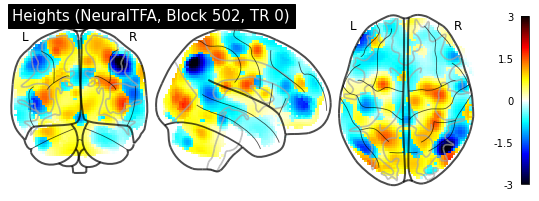

In [17]:
subject_runs = affvids_db.subject_runs()

for i in np.random.choice(range(len(subject_runs)), 1):
    subject, run = list(subject_runs)[i]
    logging.info('Plotting factors for Participant %d, run %d' % (subject, run))
    blocks = [block for block in affvids_db.blocks.values() if block['subject'] == subject and block['run'] == run]
    blocks.sort(key=lambda b: b['times'][0])
    for block in blocks:
        index = block['id']
        dtfa.plot_factor_centers(index, labeler=block_task_labeler)
        dtfa.plot_original_brain(index, labeler=block_task_labeler)
        dtfa.plot_reconstruction(index, labeler=block_task_labeler)

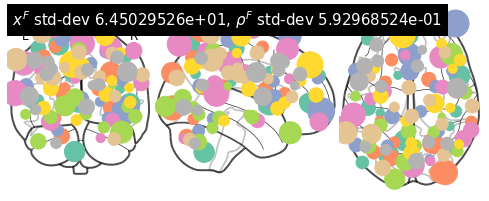

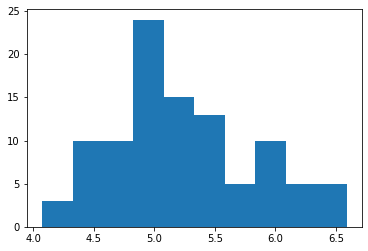

(<nilearn.plotting.displays.OrthoProjector at 0x7fa88c66bfd0>,
 tensor([[-31.3286, -29.9223,  24.9466],
         [ 48.2849, -28.1889,  51.6460],
         [ 41.8465, -43.7993,  17.1218],
         [ -1.9648,  52.1944,   3.3294],
         [-12.7226,   9.8338,  37.5345],
         [-22.4344, -73.7932,  63.7328],
         [ -5.8177, -58.7644, -48.4570],
         [ 43.1596, -67.8786,  33.8511],
         [-50.1199, -81.8844,   3.9929],
         [ 52.0499,   9.6691,   1.6533],
         [-44.0517, -24.5048,  60.3321],
         [-44.7068,  47.9446,   5.4861],
         [ -9.0006,  61.8583,  31.9146],
         [ 19.7932,   5.5393,  17.8062],
         [-26.0597, -69.9128, -13.6744],
         [-16.4195, -60.7887,  18.1782],
         [-25.9816,   2.6103,  62.0885],
         [ 37.1908, -92.5294,  -1.9823],
         [-31.7626, -38.0200,  16.4724],
         [ 64.4122, -39.1563,  21.6978],
         [-19.1924, -77.1160, -32.2473],
         [ 24.1546, -61.7558,  78.7028],
         [-19.2733,  26.0166,  13.2

In [18]:
dtfa.visualize_factor_embedding()

In [19]:
dtfa.average_reconstruction_error()

09/19/2021 03:28:15 Average reconstruction error (MSE): 1.16044609e+00
09/19/2021 03:28:15 Average data norm (Euclidean): 1.09805615e+00
09/19/2021 03:28:15 Percent average reconstruction error: 0.371337


(1.1604460938917112, 1.098056147793934, 0.0037133686606060177)

In [20]:
dtfa.average_reconstruction_error(weighted=False)

09/19/2021 03:43:29 Average reconstruction error (MSE): 1.49245330e+03 +/- 6.01899185e+01
09/19/2021 03:43:29 Average data norm (Euclidean): 1.41217738e+03 +/- 5.81928777e+01
09/19/2021 03:43:29 Percent average reconstruction error: 105.746918 +/- 3.51320685e+00


(array([1610.27563477, 1295.43444824, 1450.05786133, 1419.91125488,
        1395.61096191, 1455.55090332, 1392.6973877 , 1477.62353516,
        1416.22094727, 1485.58837891, 1490.77355957, 1529.40466309,
        1441.04150391, 1570.66430664, 1513.56542969, 1388.93823242,
        1358.75878906, 1375.34643555, 1449.25195312, 1445.43334961,
        1427.44921875, 1450.00488281, 1426.47619629, 1436.70446777,
        1457.66564941, 1546.84301758, 1465.11962891, 1468.3380127 ,
        1506.45581055, 1420.55029297, 1492.93151855, 1435.95056152,
        1387.20556641, 1466.81298828, 1465.93334961, 1520.73535156,
        1532.1282959 , 1517.5526123 , 1496.17700195, 1461.71838379,
        1499.62097168, 1521.39453125, 1432.77380371, 1464.95898438,
        1450.36193848, 1526.47424316, 1595.77404785, 1496.43798828,
        1522.02441406, 1449.25231934, 1528.73474121, 1498.86401367,
        1443.2767334 , 1432.07629395, 1456.56799316, 1500.79406738,
        1521.58007812, 1481.36376953, 1472.90393

In [21]:
def subject_task_blocks(subject_label, task_label, subject_labeler=subject_labeler, task_labeler=task_labeler):
    for b in dtfa._blocks:
        if subject_labeler(b.subject) == subject_label and task_labeler(b.task) == task_label:
            yield b

In [22]:
def subject_blocks(subject_label, subject_labeler=subject_labeler):
    for b in dtfa._blocks:
        if subject_labeler(b.subject) == subject_label:
            yield b

In [23]:
def subject_fear_ratings(subject_label, subject_labeler=subject_labeler):
    for b in subject_blocks(subject_label, subject_labeler):
        if b.individual_differences['fear_rating']:
            yield b.individual_differences['fear_rating']

In [24]:
def subject_task_fear_ratings(subject_label, task_label, subject_labeler=subject_labeler, task_labeler=task_labeler):
    for b in subject_task_blocks(subject_label, task_label, subject_labeler, task_labeler):
        if b.individual_differences['fear_rating']:
            yield b.individual_differences['fear_rating']

In [25]:
def fear_labeler(subject, task, task_labeler=task_labeler, threshold=0.5):
    subject_ratings = [rating for rating in subject_task_fear_ratings(subject, task, lambda s: s)]
    if threshold:
        if np.mean(subject_ratings) >= threshold:
            return 'Afraid of %s' % task
        return 'Unafraid of %s' % task
    result = np.mean(subject_ratings)
    return result if not np.isnan(result) else 0.0

In [26]:
def subject_fear_labeler(subject, threshold=0.5):
    subject_ratings = [rating for rating in subject_fear_ratings(subject, lambda s: s)]
    if threshold:
        if np.mean(subject_ratings) >= threshold:
            return 'Fearful'
        return 'Not fearful'
    result = np.nanmean(subject_ratings)
    return result if not np.isnan(result) else 0.0

In [27]:
def subject_average_fear_labeler(subject):
    return subject_fear_labeler(subject, threshold=None)

In [28]:
def heights_fear_labeler(subject):
    return fear_labeler(subject, 'Heights', threshold=None)

In [29]:
def spiders_fear_labeler(subject):
    return fear_labeler(subject, 'Spiders', threshold=None)

In [30]:
def social_threat_fear_labeler(subject):
    return fear_labeler(subject, 'Social threat', threshold=None)